In [1]:
from classes import *
import matplotlib.pyplot as plt
import time
import numpy as np

In [9]:
settings = []
# V1 base settings - max output at 10 with 4 offices, 2 warehouse, 4 emps in each department
# max gross is fully used, all buildings and all desks are fully used
# 3% of random combinations give positive net income on a turn
settings.append(GameSettings(base_emp_value = 1, 
                             base_emp_cost = 1,
                             base_bud_value = 4,
                             base_bud_cost = 1,
                             engineering_to_unit_cost = {0:5,1:4,2:3,3:2,4:1},
                             marketing_to_brand = {0:2,1:3,2:4,3:5,4:6},
                             finance_to_max_gross = {0:4,1:8,2:16,3:24,4:32},
                             operations_to_max_buildings = {0:2,1:3,2:4,3:5,4:6},
                             price_to_demand = {1:6,2:5,3:4,4:3,5:2} 
                            ))
# V2 - same settings as the base, but each employee only costs 0.5
# 10% of random combinations give positive net on a turn
settings.append(GameSettings(base_emp_value = 1,
                             base_emp_cost = 0.5,
                             base_bud_value = 4,
                             base_bud_cost = 1,
                             engineering_to_unit_cost = {0:5,1:4,2:3,3:2,4:1},
                             marketing_to_brand = {0:2,1:3,2:4,3:5,4:6},
                             finance_to_max_gross = {0:4,1:8,2:16,3:24,4:32},
                             operations_to_max_buildings = {0:2,1:3,2:4,3:5,4:6},
                             price_to_demand = {1:6,2:5,3:4,4:3,5:2} 
                            ))

In [11]:
res_dfs, count = [], 0
for setting in settings:
    # set up game and generate sample gamestates
    start_time = time.time()
    game = Game(setting, no_players = 1)
    res = game.players[0].generate_game_states(setting, game.companies[0], iterations = 10000, debug = 0)
    print('---- finished simulation for setting: ' + str(count) + ' time: ' + str((time.time() - start_time)) + ' seconds ----')
    
    # analyse output
    res = res.sort_values(by = 'net income', ascending = False)
    net_list = res['net income'].tolist()
    pos_rat = len([x for x in net_list if x > 0])/len(net_list)
    print('mean: ' + str(np.mean(net_list)) + ', std: ' + str(np.std(net_list)) + ', pos ratio: ' + str(pos_rat))
    print(res[0:5][['gamestate key','net income']])
    res_dfs.append(res)
    count += 1

---- finished simulation for setting: 0 time: 0.4089937210083008 seconds ----
mean: -9.828889281299665, std: 4.624276123746564, pos ratio: 0.015362881864736005
              gamestate key  net income
4434  (4, 4, 4, 4, 4, 2, 5)          10
3137  (4, 4, 4, 3, 4, 2, 5)           7
3373  (3, 3, 4, 2, 3, 2, 5)           7
1980  (1, 2, 4, 0, 2, 1, 5)           6
314   (1, 3, 4, 0, 2, 1, 5)           5
---- finished simulation for setting: 1 time: 0.41344594955444336 seconds ----
mean: -5.249208582483292, std: 4.140915484279538, pos ratio: 0.09919099542736545
              gamestate key  net income
4168  (4, 4, 4, 4, 4, 2, 5)        18.0
4659  (4, 4, 4, 3, 4, 2, 5)        14.5
3609  (3, 3, 4, 2, 3, 2, 5)        13.0
5038  (4, 3, 4, 2, 4, 2, 5)        11.5
1364  (4, 3, 3, 4, 4, 2, 5)        11.0


In [4]:
special_keys = [
    (4, 4, 4, 4, 4, 2, 5), # max employees + 4 offices and 2 warehouses
]
for i in range(len(settings)):
    print('--- special keys for setting: ' + str(0))
    setting = settings[i]
    game = Game(setting, no_players = 1)
    for key in special_keys:
        print('key: ' + str(key))
        game.companies[0].analyse_game_state(key, debug=1)
        print()

for i in range(len(settings)):
    print('--- top 3 results from setting: ' + str(0))
    setting = settings[i]
    game = Game(setting, no_players = 1)
    for key in res_dfs[i][:3]['gamestate key']:
        print('key: ' + str(key))
        game.companies[0].analyse_game_state(key, debug=1)
        print()

--- special keys for setting: 0
key: (4, 4, 4, 4, 4, 2, 5)
A, employees: 16/16, operations: 4, engineering: 4, finance: 4, marketing: 4
B, buildings: 6/6, production: 8, desks: 16
C, price: 5, price demand: 2, brand demand: 6, demand strength: 8, actual demand: 8
D, unit cost: 1, unit profit: 4, units sold: 8
E, gross income: 32/32, actual gross: 32, total cost: 22, net: 10

--- special keys for setting: 0
key: (4, 4, 4, 4, 4, 2, 5)
A, employees: 16/16, operations: 4, engineering: 4, finance: 4, marketing: 4
B, buildings: 6/6, production: 8, desks: 16
C, price: 5, price demand: 2, brand demand: 6, demand strength: 8, actual demand: 8
D, unit cost: 1, unit profit: 4, units sold: 8
E, gross income: 32/32, actual gross: 32, total cost: 14.0, net: 18.0

--- top 3 results from setting: 0
key: (4, 4, 4, 4, 4, 2, 5)
A, employees: 16/16, operations: 4, engineering: 4, finance: 4, marketing: 4
B, buildings: 6/6, production: 8, desks: 16
C, price: 5, price demand: 2, brand demand: 6, demand stre

(array([0.01615434, 0.07433472, 0.10101104, 0.07594396, 0.04902006,
        0.0207345 , 0.00916031, 0.00328038, 0.00111409, 0.00012379]),
 array([-14.  , -11.15,  -8.3 ,  -5.45,  -2.6 ,   0.25,   3.1 ,   5.95,
          8.8 ,  11.65,  14.5 ]),
 <BarContainer object of 10 artists>)

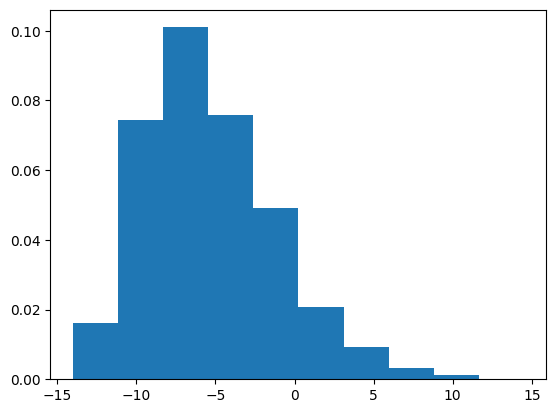

In [5]:
res_arr = res_dfs[1]['net income'].to_numpy()
plt.hist(res_arr, density=True)